In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [49]:
data_csv = pd.read_csv("https://raw.githubusercontent.com/jamesrobertlloyd/gp-structure-search/master/data/raw/TSDL/monthly-beer-production-in-austr.csv")

In [50]:
data_csv.columns

Index(['Month', 'Monthly beer production in Australia: megalitres. Includes ale and stout. Does not include beverages with alcohol percentage less than 1.15. Jan 1956 ? Aug 1995'], dtype='object')

In [51]:
data_csv.rename(columns = {'Monthly beer production in Australia: megalitres. Includes ale and stout. Does not include beverages with alcohol percentage less than 1.15. Jan 1956 ? Aug 1995' : 'beer'}, inplace = True)

In [ ]:
data_csv

In [53]:
print(data_csv)

                                                 Month   beer
0                                              1956-01   93.2
1                                              1956-02   96.0
2                                              1956-03   95.2
3                                              1956-04   77.1
4                                              1956-05   70.9
..                                                 ...    ...
472                                            1995-05  151.0
473                                            1995-06  130.0
474                                            1995-07  119.0
475                                            1995-08  153.0
476  Monthly beer production in Australia: megalitr...    NaN

[477 rows x 2 columns]


In [54]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   477 non-null    object 
 1   beer    476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [55]:
def get_beer(i):
   z = data_csv['beer'][i]
   return z

In [56]:
def mov_avg_filter(x_n, x_meas):
  n = len(x_n)
  for i in range(n-1):
    x_n[i] = x_n[i+1]
  x_n[n-1] = x_meas
  x_avg = np.mean(x_n)
  return x_avg, x_n

In [57]:
len(data_csv)

477

In [58]:
n = 10
n_samples = 477
time_end = 10

In [59]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [60]:
for i in range(n_samples):

    x_meas = get_beer(i)
    
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
        print(x_meas * np.ones(n))
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)
        print(x_n)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

[93.2 93.2 93.2 93.2 93.2 93.2 93.2 93.2 93.2 93.2]
[93.2 93.2 93.2 93.2 93.2 93.2 93.2 93.2 93.2 96. ]
[93.2 93.2 93.2 93.2 93.2 93.2 93.2 93.2 96.  95.2]
[93.2 93.2 93.2 93.2 93.2 93.2 93.2 96.  95.2 77.1]
[93.2 93.2 93.2 93.2 93.2 93.2 96.  95.2 77.1 70.9]
[93.2 93.2 93.2 93.2 93.2 96.  95.2 77.1 70.9 64.8]
[93.2 93.2 93.2 93.2 96.  95.2 77.1 70.9 64.8 70.1]
[93.2 93.2 93.2 96.  95.2 77.1 70.9 64.8 70.1 77.3]
[93.2 93.2 96.  95.2 77.1 70.9 64.8 70.1 77.3 79.5]
[ 93.2  96.   95.2  77.1  70.9  64.8  70.1  77.3  79.5 100.6]
[ 96.   95.2  77.1  70.9  64.8  70.1  77.3  79.5 100.6 100.7]
[ 95.2  77.1  70.9  64.8  70.1  77.3  79.5 100.6 100.7 107.1]
[ 77.1  70.9  64.8  70.1  77.3  79.5 100.6 100.7 107.1  95.9]
[ 70.9  64.8  70.1  77.3  79.5 100.6 100.7 107.1  95.9  82.8]
[ 64.8  70.1  77.3  79.5 100.6 100.7 107.1  95.9  82.8  83.3]
[ 70.1  77.3  79.5 100.6 100.7 107.1  95.9  82.8  83.3  80. ]
[ 77.3  79.5 100.6 100.7 107.1  95.9  82.8  83.3  80.   80.4]
[ 79.5 100.6 100.7 107.1  95.9  82.8

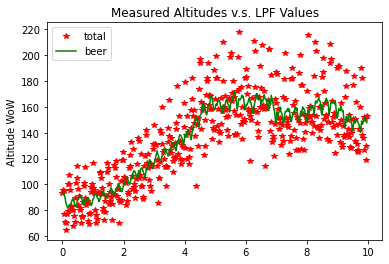

In [63]:
plt.plot(time, x_meas_save, 'r*', label='total')
plt.plot(time, x_avg_save, 'g-', label='beer')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.ylabel('Altitude WoW')
plt.savefig('/content/png')